#  AIGS1003 - Machine Learning - Assignment 2

referenced: Sudhan Manovah

Question 1: Implementation and answers follow,

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pandas as pd


from collections import defaultdict


from sklearn import datasets
from sklearn.datasets import make_blobs

# ignoring warnings
import warnings
warnings.simplefilter("ignore")

import os, cv2, json


np.random.seed(42)

> # load the dataset

In [3]:
iris=datasets.load_iris()

In [4]:
X=pd.DataFrame(iris.data,columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y=pd.DataFrame(iris.target,columns=['Classes'])

In [5]:
X['species'] = pd.Series(np.random.randn(150), index=X.index)
X['species'][y['Classes']==0]='Setosa'
X['species'][y['Classes']==1]='versicolor'
X['species'][y['Classes']==2]='virginica'

In [6]:
X.shape

(150, 5)

In [7]:
clusters=len(np.unique(y))

# Function to calculate euclidean distance

In [8]:
def euclidean_dis(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# KMeans Implementation

In [88]:
from collections import defaultdict


class KMeans:
    
    def __init__(self,data,k,max_ite):
        self.data=data
        self.k=k
        self.max_ite=max_ite
        
    def predict(self):

        centroids = defaultdict(int)
        
        K=self.k
        max_iter=self.max_ite
        
        for i in range(K):
            centroids[i] = self.data[i]

        r=0

        for i in range(max_iter):
            r=r+1
            classes=defaultdict(list)
            
            for key in range(K):
                classes[key]=[]
            for datapoint in self.data:
                distance=[]
                for j in range(K):

                    dis=euclidean_dis(datapoint,centroids[j])

                    distance.append(dis)
                mindis=min(distance)

                index=distance.index(mindis)
                classes[index].append(datapoint)
                old_centroid=dict(centroids)

            for t in range(K):
                class_=classes[t]
                new_centroid=np.mean(class_,axis=0)
                centroids[t]=new_centroid
            flg=1
            for t in range(K):
                a=centroids[t]
                b=old_centroid[t]
                if np.sum((a - b)/b * 100) > 0.001:
                    flg = 0

            if flg==1:
                break

        return classes,centroids

class0=[]
class1=[]
class2=[]

for i in range(len(iris.target)):
    if iris.target[i]==0:
        class0.append(iris.data[i])
    elif iris.target[i]==1:
        class1.append(iris.data[i])
    elif iris.target[i]==2:
        class2.append(iris.data[i])


class0=np.array(class0).tolist()
class1=np.array(class1).tolist()
class2=np.array(class2).tolist()


# utility function

def subset(array1,array2):
    flg=0
    for i in range(len(array1)):
        if(array2==array1[i]):
            flg=1
            break
    if(flg==1):
        return True
    else:
        return False
    

# confusion matrix
    
def confusion_matrix(a,b,c,classes,):
    
    cm=[[0 for i in range(y.Classes.nunique())] for i in range(y.Classes.nunique())]

    for element in a:

        if subset(classes[2],element):
            cm[0][0]=cm[0][0]+1
        elif subset(classes[1],element):
            cm[0][1]=cm[0][1]+1
        elif subset(classes[0],element):
            cm[0][2]=cm[0][2]+1

    for element in b:

        if subset(classes[2],element):
            cm[1][0]=cm[1][0]+1
        elif subset(classes[1],element):
            cm[1][1]=cm[1][1]+1
        elif subset(classes[0],element):
            cm[1][2]=cm[1][2]+1

    for element in c:

        if subset(classes[2],element):

            cm[2][0]=cm[2][0]+1
        elif subset(classes[1],element):

            cm[2][1]=cm[2][1]+1
        elif subset(classes[0],element):

            cm[2][2]=cm[2][2]+1
            
    return cm


# performance metrics
            
class Metrics:
    
    def __init__(self,confusion_m):
        self.confusion_m=confusion_m
        self.total=np.sum(confusion_m)
        self.diagonal=np.sum(np.diag(confusion_m))
    
    def accuracy(self):
        accuracy=(self.diagonal/self.total)
        return accuracy
    
    def recall(self):
        recall=np.diag(self.confusion_m)/np.sum(self.confusion_m,axis=1)
        recall=np.mean(recall)
        return recall
    
    def precision(self):
        precision=np.diag(self.confusion_m)/np.sum(self.confusion_m,axis=0)
        precision=np.mean(precision)
        return precision
    
    def f1_score(self,precision,recall):
        f1_score=(2*precision*recall)/(precision+recall)
        
        return f1_score


def showscatterplot(classes,centroids,clusters):
    for i in range(0,3):
        classes[i]=np.array(classes[i]).tolist()

    label = ["Iris-setosa","Iris-versicolor","Iris-virginica"]    
    color=['g','c','m'] 
    color_1 = ['r','y','b']
    for i in range(0,clusters):
        print(label[i] + ":" + str(len(classes[i])))
        print(label[i] + " centroids:" + np.array2string(centroids[i], precision=2, separator=',',
                      suppress_small=True))
    for i in range(0,clusters):
        ref = pd.DataFrame.from_records(classes[i], columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']) 
        plt.scatter(ref["SepalLengthCm"],ref["SepalWidthCm"],c=color[i],label=label[i])
    
    for i in range(0,clusters):
        plt.scatter(centroids[i][0],centroids[i][1], c=color_1[i],label = "centroids:"+label[i])

        
    plt.xlabel("SepalLengthCm")
    plt.ylabel("SepalWidthCm")
    plt.legend()

# prediction

Question 1: Submit results for one sample run giving the initial clustering, final clustering, and confusion matrix.

Iris-setosa:89
Iris-setosa centroids:[6.16,3.26,4.03,1.33]
Iris-versicolor:50
Iris-versicolor centroids:[5.56,2.66,3.81,1.18]
Iris-virginica:11
Iris-virginica centroids:[4.55,3.2 ,1.35,0.2 ]


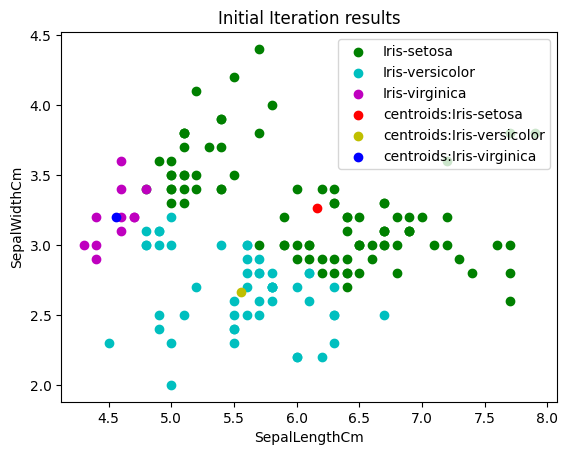

In [89]:
#setting Initial_Iteration to 1 , to show results of first iteration
Initial_Iteration = 1
kmeans=KMeans(iris.data[:,:4],clusters,Initial_Iteration)

classes,centroids=kmeans.predict()
plt.title("Initial Iteration results")
#used fields SepalLengthCm,SepalWidthCm to show as scatter plot
showscatterplot(classes,centroids,clusters)

Iris-setosa:39
Iris-setosa centroids:[6.85,3.08,5.72,2.05]
Iris-versicolor:61
Iris-versicolor centroids:[5.88,2.74,4.39,1.43]
Iris-virginica:50
Iris-virginica centroids:[5.01,3.43,1.46,0.25]


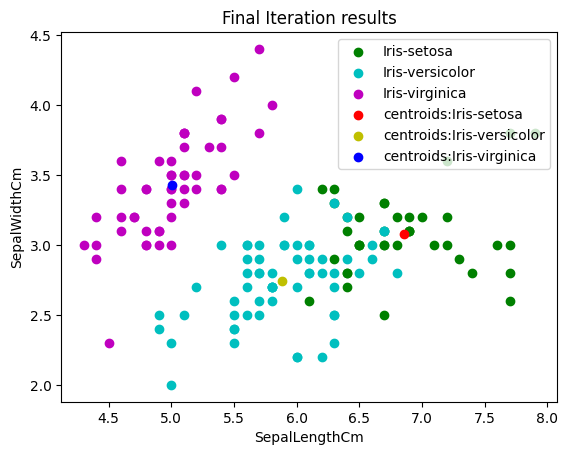

In [90]:
#setting 1000 iterations as max for converging, Final iteration
To_converge = 1000
kmeans=KMeans(iris.data[:,:4],clusters,To_converge)
classes,centroids=kmeans.predict()

plt.title("Final Iteration results")
#used fields SepalLengthCm,SepalWidthCm to show as scatter plot
showscatterplot(classes,centroids,clusters)

In [91]:
#confusion matrix
matrix=confusion_matrix(class0,class1,class2,classes)
performance=Metrics(matrix)

accuracy=performance.accuracy()
recall=performance.recall()
precision=performance.precision()
f1_score=performance.f1_score(precision,recall)

print('confusion matrix is:',end='\n')
print(np.array(matrix),end='\n')

print("Accuracy of the model is {}".format(accuracy*100))
print("Recall of the model is {}".format(recall*100))
print("Precision of the model is {}".format(precision*100))
print("F1-Score of the model is {}".format(f1_score*100))

confusion matrix is:
[[50  0  0]
 [ 0 47  3]
 [ 0 14 36]]
Accuracy of the model is 88.66666666666667
Recall of the model is 88.66666666666667
Precision of the model is 89.78562421185372
F1-Score of the model is 89.22263731397425


Run your algorithm 55 times over the Iris dataset; in each run, use a different initialization. For
each run, compute the accuracy of clustering and plot the distribution of the accuracies

Iris-setosa:94
Iris-setosa centroids:[6.33,2.9 ,5.  ,1.72]
Iris-versicolor:56
Iris-versicolor centroids:[5.03,3.31,1.67,0.33]


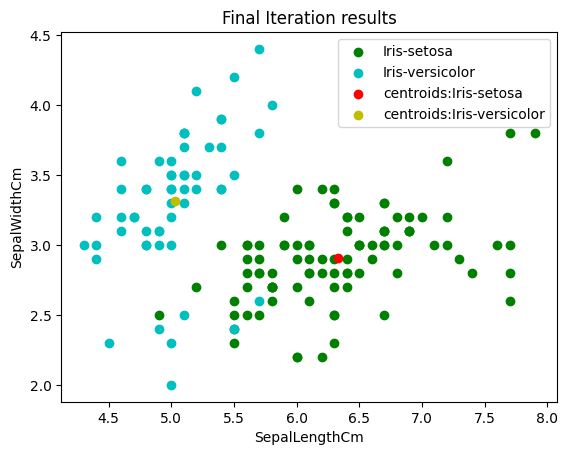

In [92]:
#setting cluster to 2
To_run = 55
clusters = 2
kmeans=KMeans(iris.data[:,:4],clusters,To_run)
classes,centroids=kmeans.predict()

plt.title("Final Iteration results")
#used fields SepalLengthCm,SepalWidthCm to show as scatter plot
showscatterplot(classes,centroids,clusters)

Question 2 - you are required only to experiment with at least 2 hyperparameters and interpret your findings

i)Tried changing the gamma hyper paramater<br>

observation:<br><br>
If Gamma is closer to zero, the robot is tend to consider only immediate rewards.  If Gamma is closer to one, the robot will considers future rewards with greater weight, willing to delay the reward.<br>

with gamma as 0.8,<br>
Optimal Path for starting state 0<br>
0 -> 4 -> 5<br>
Optimal Path for starting state 1<br>
1 -> 5<br>
Optimal Path for starting state 2<br>
2 -> 3 -> 1 -> 5<br>
Optimal Path for starting state 3<br>
3 -> 1 -> 5<br>
Optimal Path for starting state 4<br>
4 -> 5<br>
Optimal Path for starting state 5<br>
5<br>

with gamma as 0.1,<br>
Optimal Path for starting state 0<br>
0 -> 4 -> 5<br>
Optimal Path for starting state 1<br>
1 -> 5<br>
Optimal Path for starting state 2<br>
2 -> 3 -> 2 -> 3 -> 2 -> 3 -> 2 -> 3 -> 2 -> 3 -> 2 -> 3 -> 2 -> 3 -> 2 -> 3 -> 2 -> 3 -> 2 -> 3 -> 2<br>
Optimal Path for starting state 3<br>
3 -> 2 -> 3 -> 2 -> 3 -> 2 -> 3 -> 2 -> 3 -> 2 -> 3 -> 2 -> 3 -> 2 -> 3 -> 2 -> 3 -> 2 -> 3 -> 2 -> 3<br>
Optimal Path for starting state 4<br>
4 -> 5<br>
Optimal Path for starting state 5<br>
5<br>

ii)Tried varying the alpha parameter, but did not see any difference in optimal path<br>
iii)reducing the n_episodes to 10 and having a gamma value 0.1, results in a optimal path. But earlier only low gamma value 
behaviour was different.<br>
iv)tried changing epsilon but didn't affect anything.<br>